## Cluster Analysis ##

A fairly broad statistical topic is cluster analysis, which is a way to group objects that are similar. It is easy to see how grouping similar objects would be useful for pattern recognition, image segmentation, machine learning, and more. There isn't one algorithm for clustering objects; rather, there are a group of useful algorithms that often have to be fitted to the task at hand.

Of the dozens of cluster analysis algorithms that are possible, we are going to make use of hierarchical clustering analysis (HCA). There are two broad categories of HCA: top-down and bottom-up. The top down algorithms are divisive: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy. We are going to be concerned with the bottom up 'agglomerative' approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

### Agglomerative ###

The agglomerative technique is greedy, and generally speaking is not very efficient. According to Wikipedia, the time complexity is O(n^3) and requires O(n^2) memory.

The method below makes use of the Ward method by default, but the `clusterer` param can be changed to include any other HCA algorithm.

`librosa.segment.agglomerative(data, k, clusterer=None, axis=-1)`

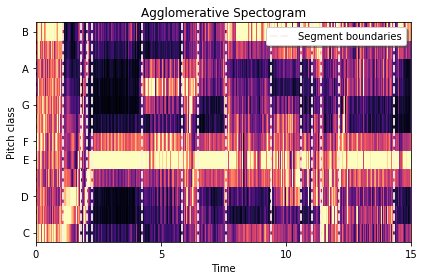

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# load audio file
y, sr = librosa.load('01 Mravalzhamier - Table Song, Kakheti.wav', offset=0, duration=15)


chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
# change the k value to any int, the number of segments to produce.
bounds = librosa.segment.agglomerative(chroma, 15)

# Converts frame counts to time (seconds)
bound_times = librosa.frames_to_time(bounds, sr=sr)

#plot

plt.figure()
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(bound_times, 0, chroma.shape[0], color='linen', linestyle='--',linewidth=2, alpha=0.9, label='Segment boundaries')
plt.axis('tight')
plt.legend(frameon=True, shadow=True)
plt.title('Agglomerative Spectogram')
plt.tight_layout()
plt.show()